<a href="https://colab.research.google.com/github/MOISECHRIST/Tensorflow_DeepLearn_Course/blob/main/Tensorflow_Neural_Network_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense

import numpy as np

Import Data

In [2]:
data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train, y_train = data[0]
X_test, y_test = data[1]

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Data Vizualisation

In [6]:
import matplotlib.pyplot as plt

In [7]:
img_id = np.random.choice(60000, 10)

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

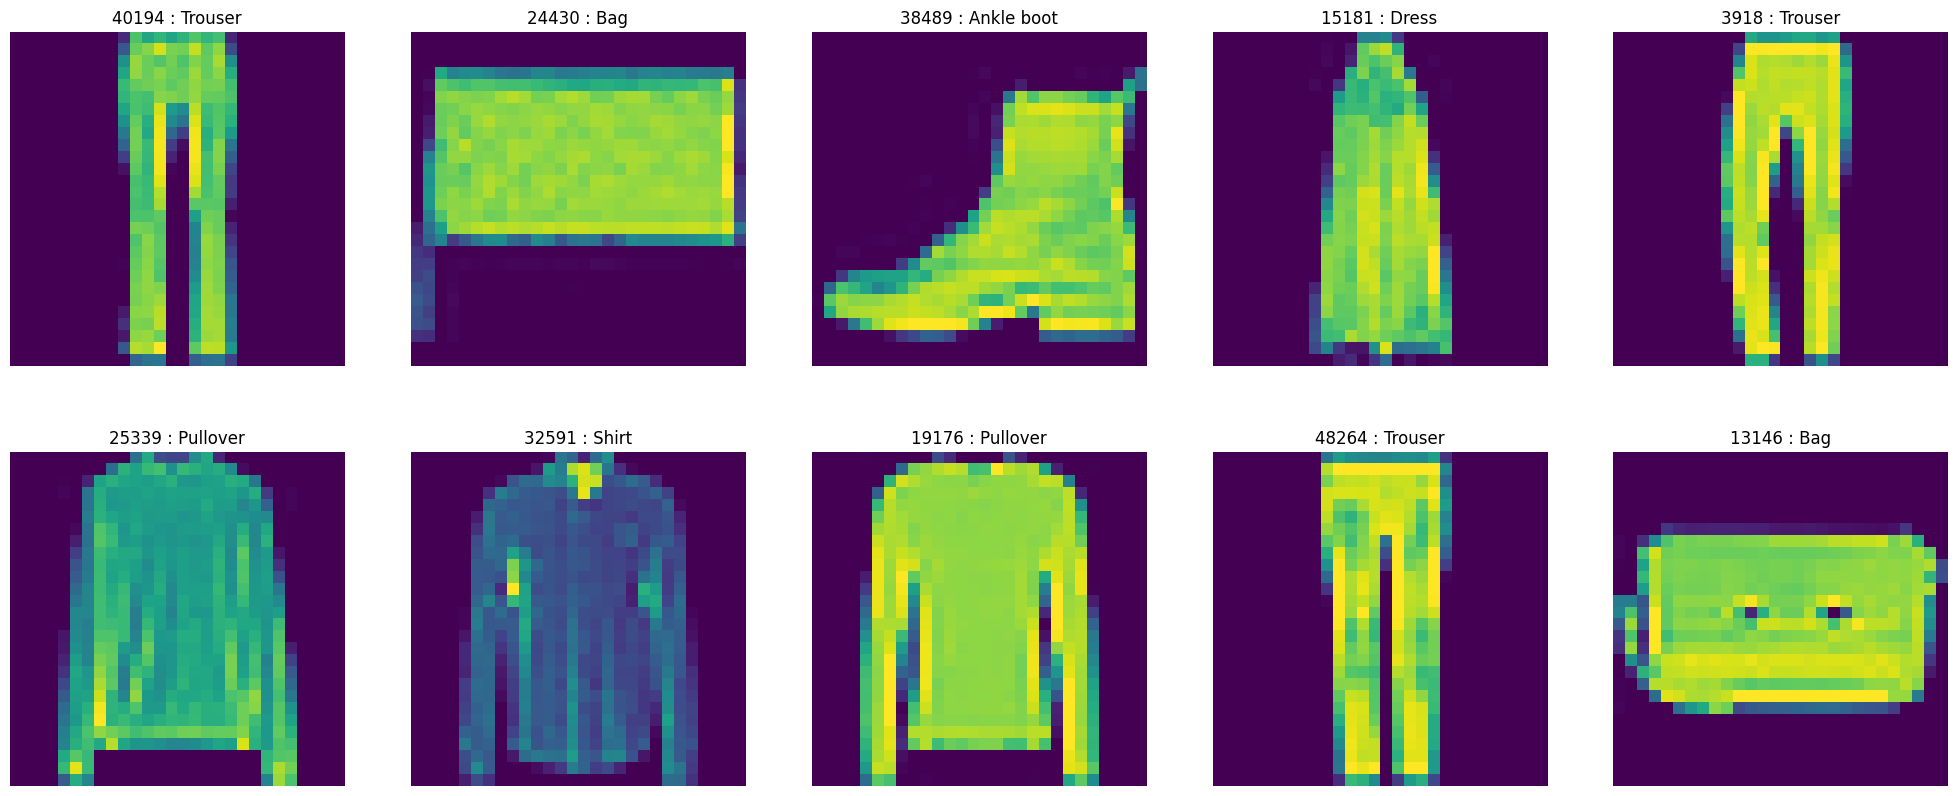

In [9]:
plt.figure(figsize=(25, 10))
for i, img in enumerate(img_id):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[img])
    plt.axis('off')
    plt.title(f"{img} : {labels[y_train[img]]}")

Inputs Data Processing

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
Flatten_X_train = X_train.reshape(60000, 784)
Flatten_X_test = X_test.reshape(10000, 784)

Outcome Processing

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
enc = OneHotEncoder()
ho_y_train = enc.fit_transform(y_train.reshape(60000,1))
hot_y_train = ho_y_train.toarray()

In [14]:
ho_y_train.shape

(60000, 10)

In [15]:
ho_y_test = enc.transform(y_test.reshape(10000,1))
hot_y_test = ho_y_test.toarray()

In [16]:
ho_y_test.shape

(10000, 10)

In [17]:
y_train[0], hot_y_train[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [18]:
y_test[0], hot_y_test[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

Model Configuration

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=128, activation='sigmoid', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Model Training

In [23]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2356 - loss: 2.2858
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5287 - loss: 2.1013
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5725 - loss: 1.8240
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5965 - loss: 1.5401
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6293 - loss: 1.3367
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6514 - loss: 1.1928
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6693 - loss: 1.0851
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6866 - loss: 1.0030
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6933 - loss: 0.9448
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7089 - loss: 0.8859
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7113 - loss: 0.8509
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

In [24]:
metrics=model.history.history

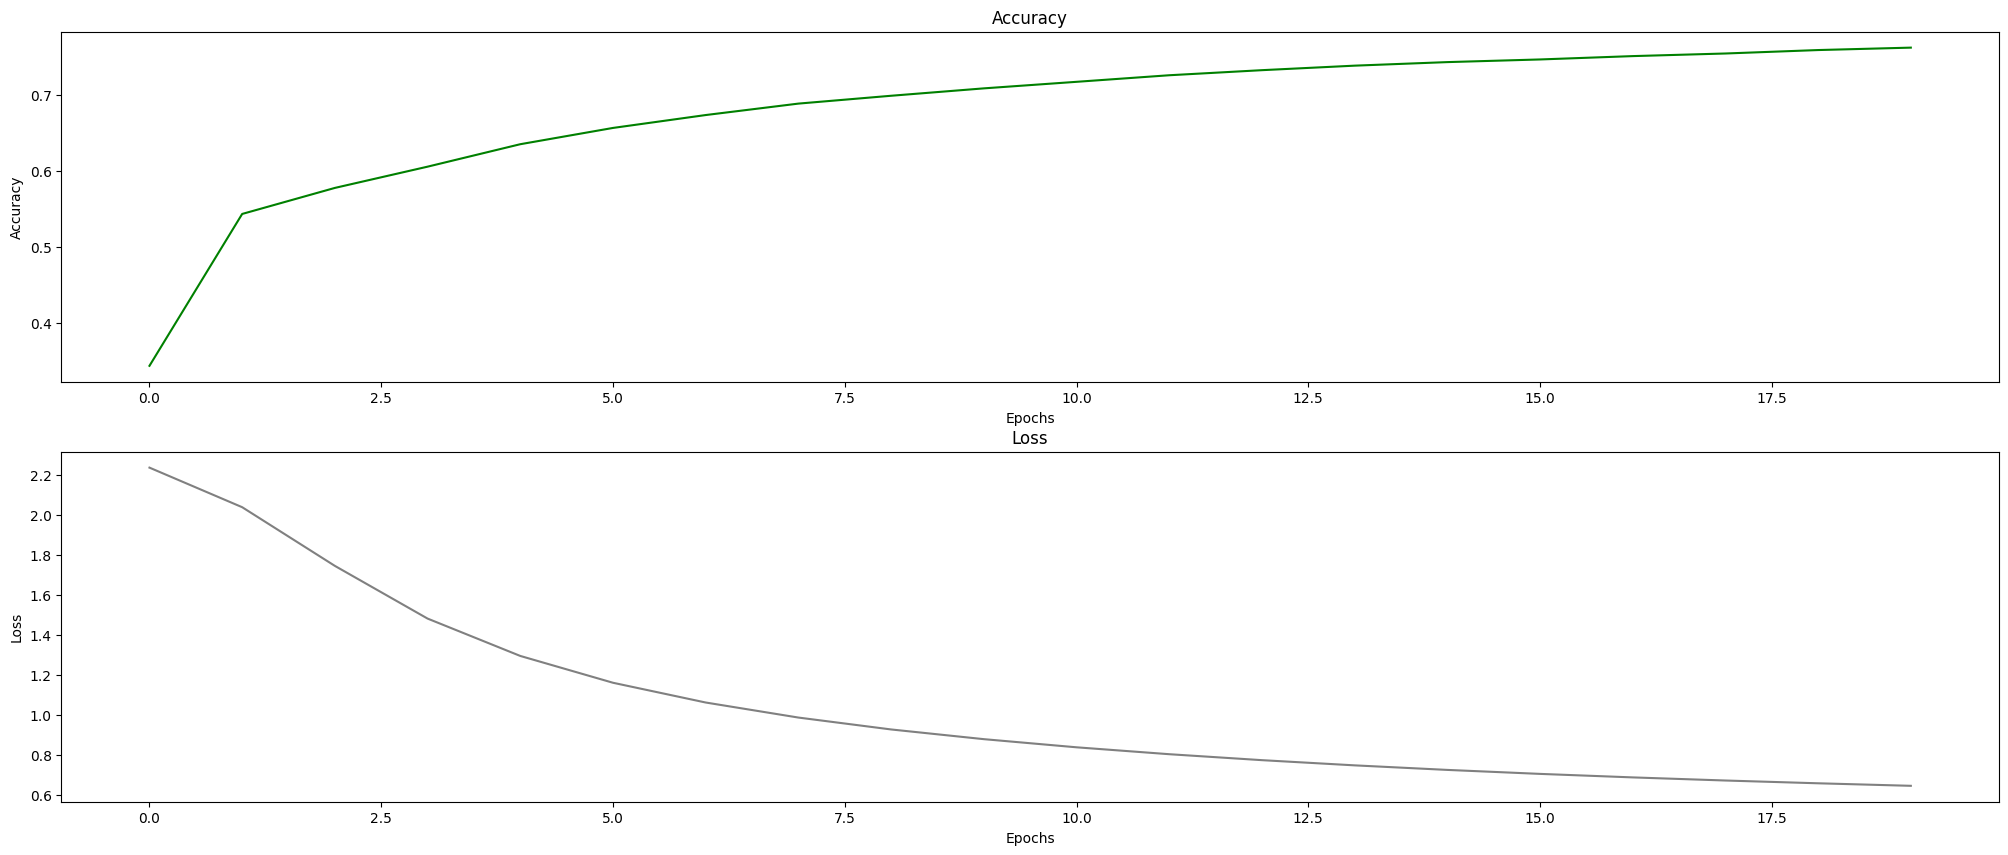

In [25]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

Model Evaluation

In [26]:
y_pred = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


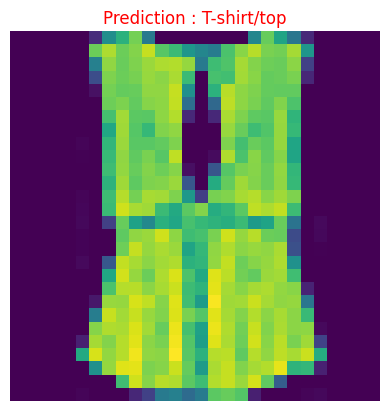

In [27]:
img = np.random.choice(10000)
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred[img])]}", color='green' if np.argmax(y_pred[img])==y_test[img] else 'red')
plt.show()

In [28]:
y_pred_labels = np.array([labels[np.argmax(i)] for i in y_pred])
y_test_labels = np.array([labels[i] for i in y_test])

In [29]:
print(f"Test's accuracy : {100*np.sum(y_pred_labels==y_test_labels)/len(y_pred_labels):.3f} %")

Test's accuracy : 75.620 %


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
cm = confusion_matrix(y_test_labels, y_pred_labels)

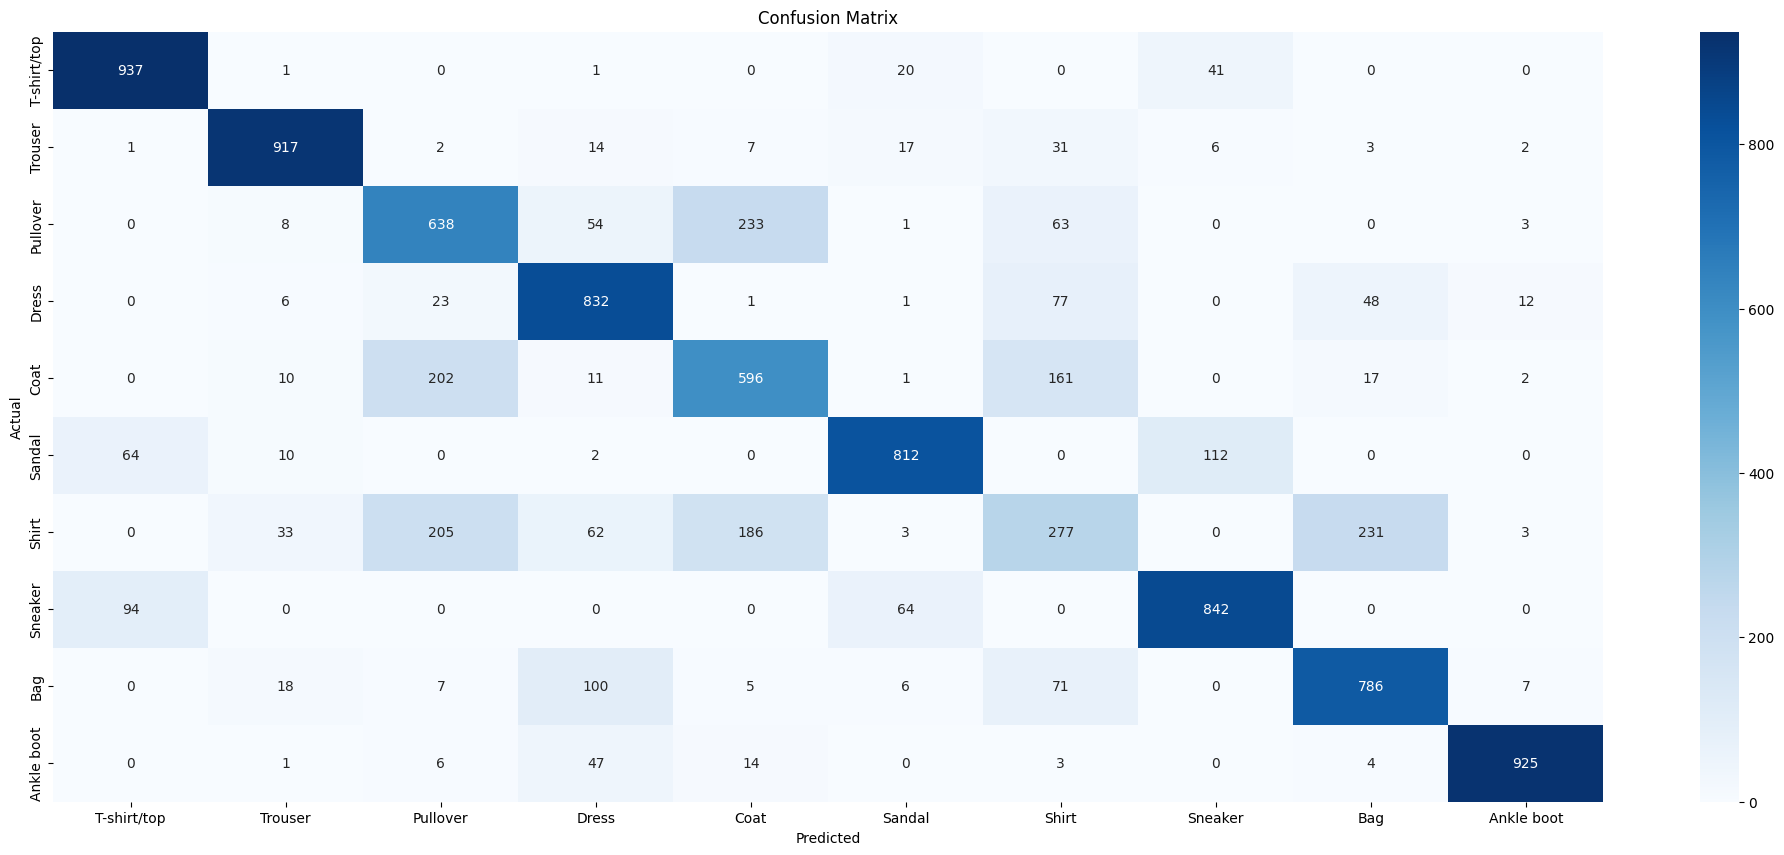

In [32]:
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from joblib import dump

In [34]:
dump(model, 'model_fashion_mnist_tf_neural_network.joblib')

['model_fashion_mnist_tf_neural_network.joblib']

In [35]:
model2 = Sequential()

In [36]:
model2.add(Dense(units=128, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,284 (462.05 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model2.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5668 - loss: 1.3881
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7774 - loss: 0.6538
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8103 - loss: 0.5527
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8264 - loss: 0.5107
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8318 - loss: 0.4850
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8391 - loss: 0.4669
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8446 - loss: 0.4487
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8483 - loss: 0.4350
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8507 - loss: 0.4258
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8542 - loss: 0.4199
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8571 - loss: 0.4110
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [40]:
metrics2=model2.history.history

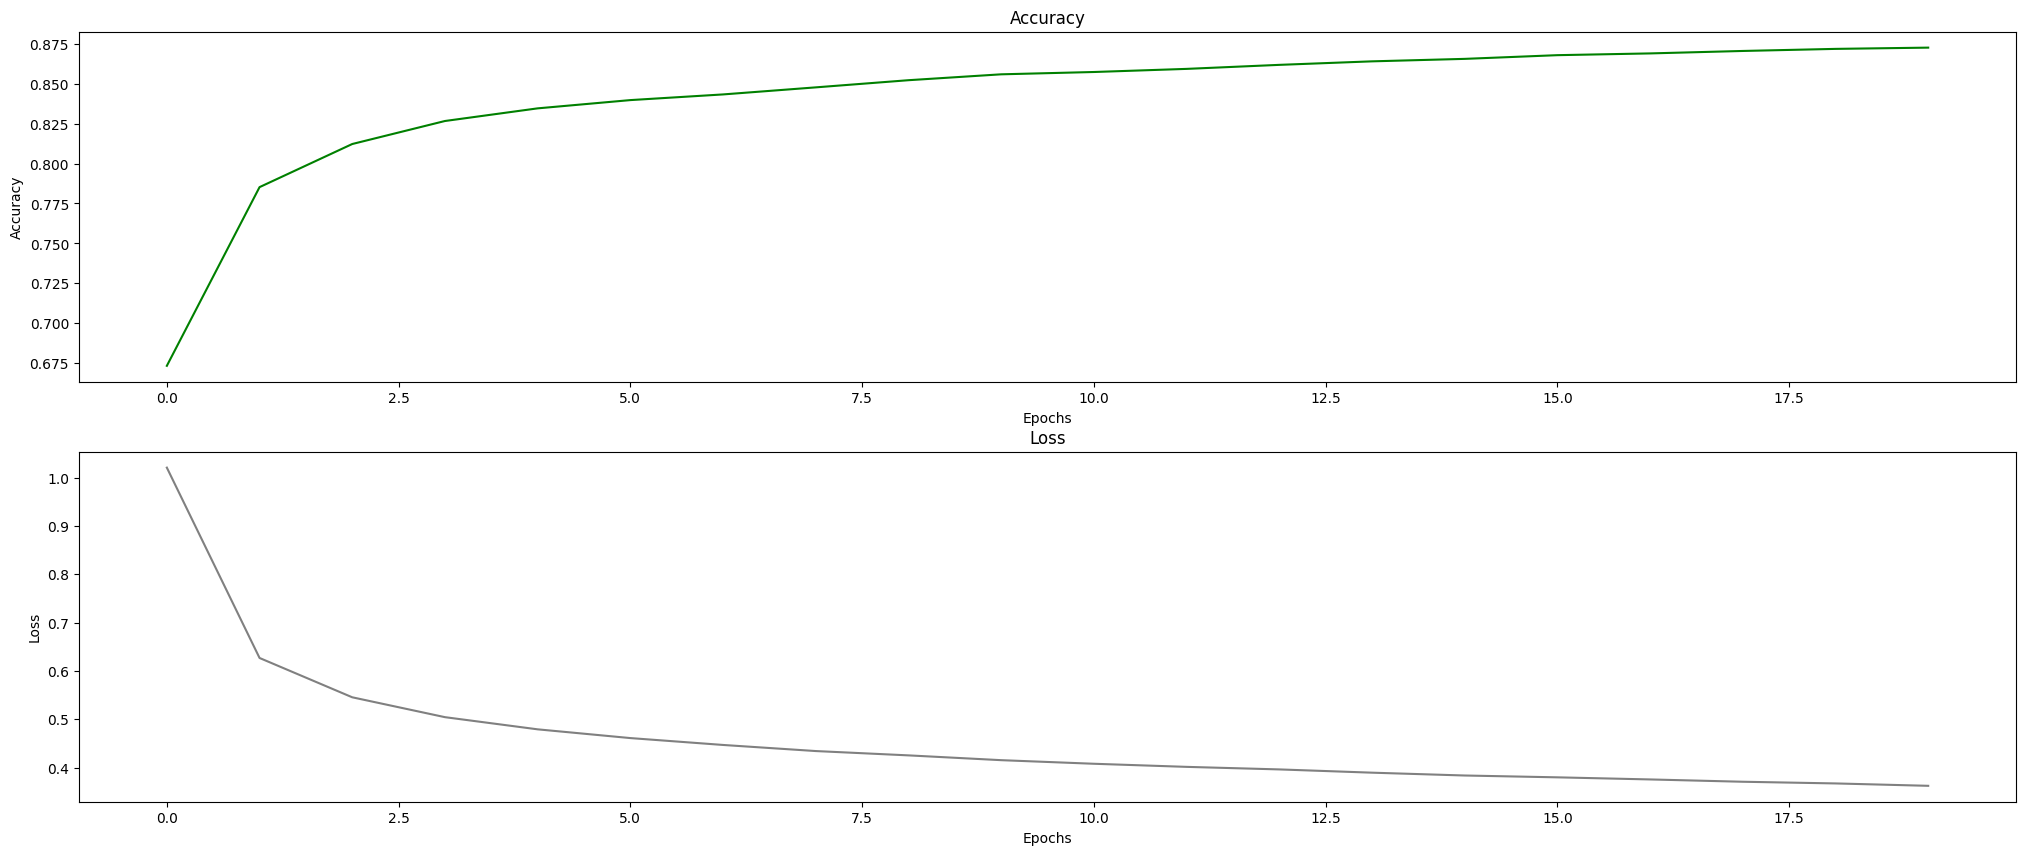

In [41]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics2['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics2['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

In [42]:
y_pred2 = model2.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


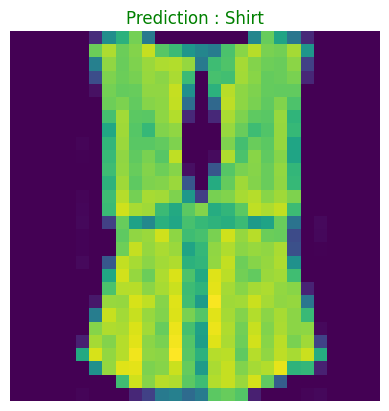

In [43]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred2[img])]}", color='green' if np.argmax(y_pred2[img])==y_test[img] else 'red')
plt.show()

In [44]:
y_pred2_labels = np.array([labels[np.argmax(i)] for i in y_pred2])

In [45]:
print(f"Test's accuracy : {100*np.sum(y_pred2_labels==y_test_labels)/len(y_pred2_labels):.3f} %")

Test's accuracy : 85.510 %


In [46]:
cm2 = confusion_matrix(y_test_labels, y_pred2_labels)

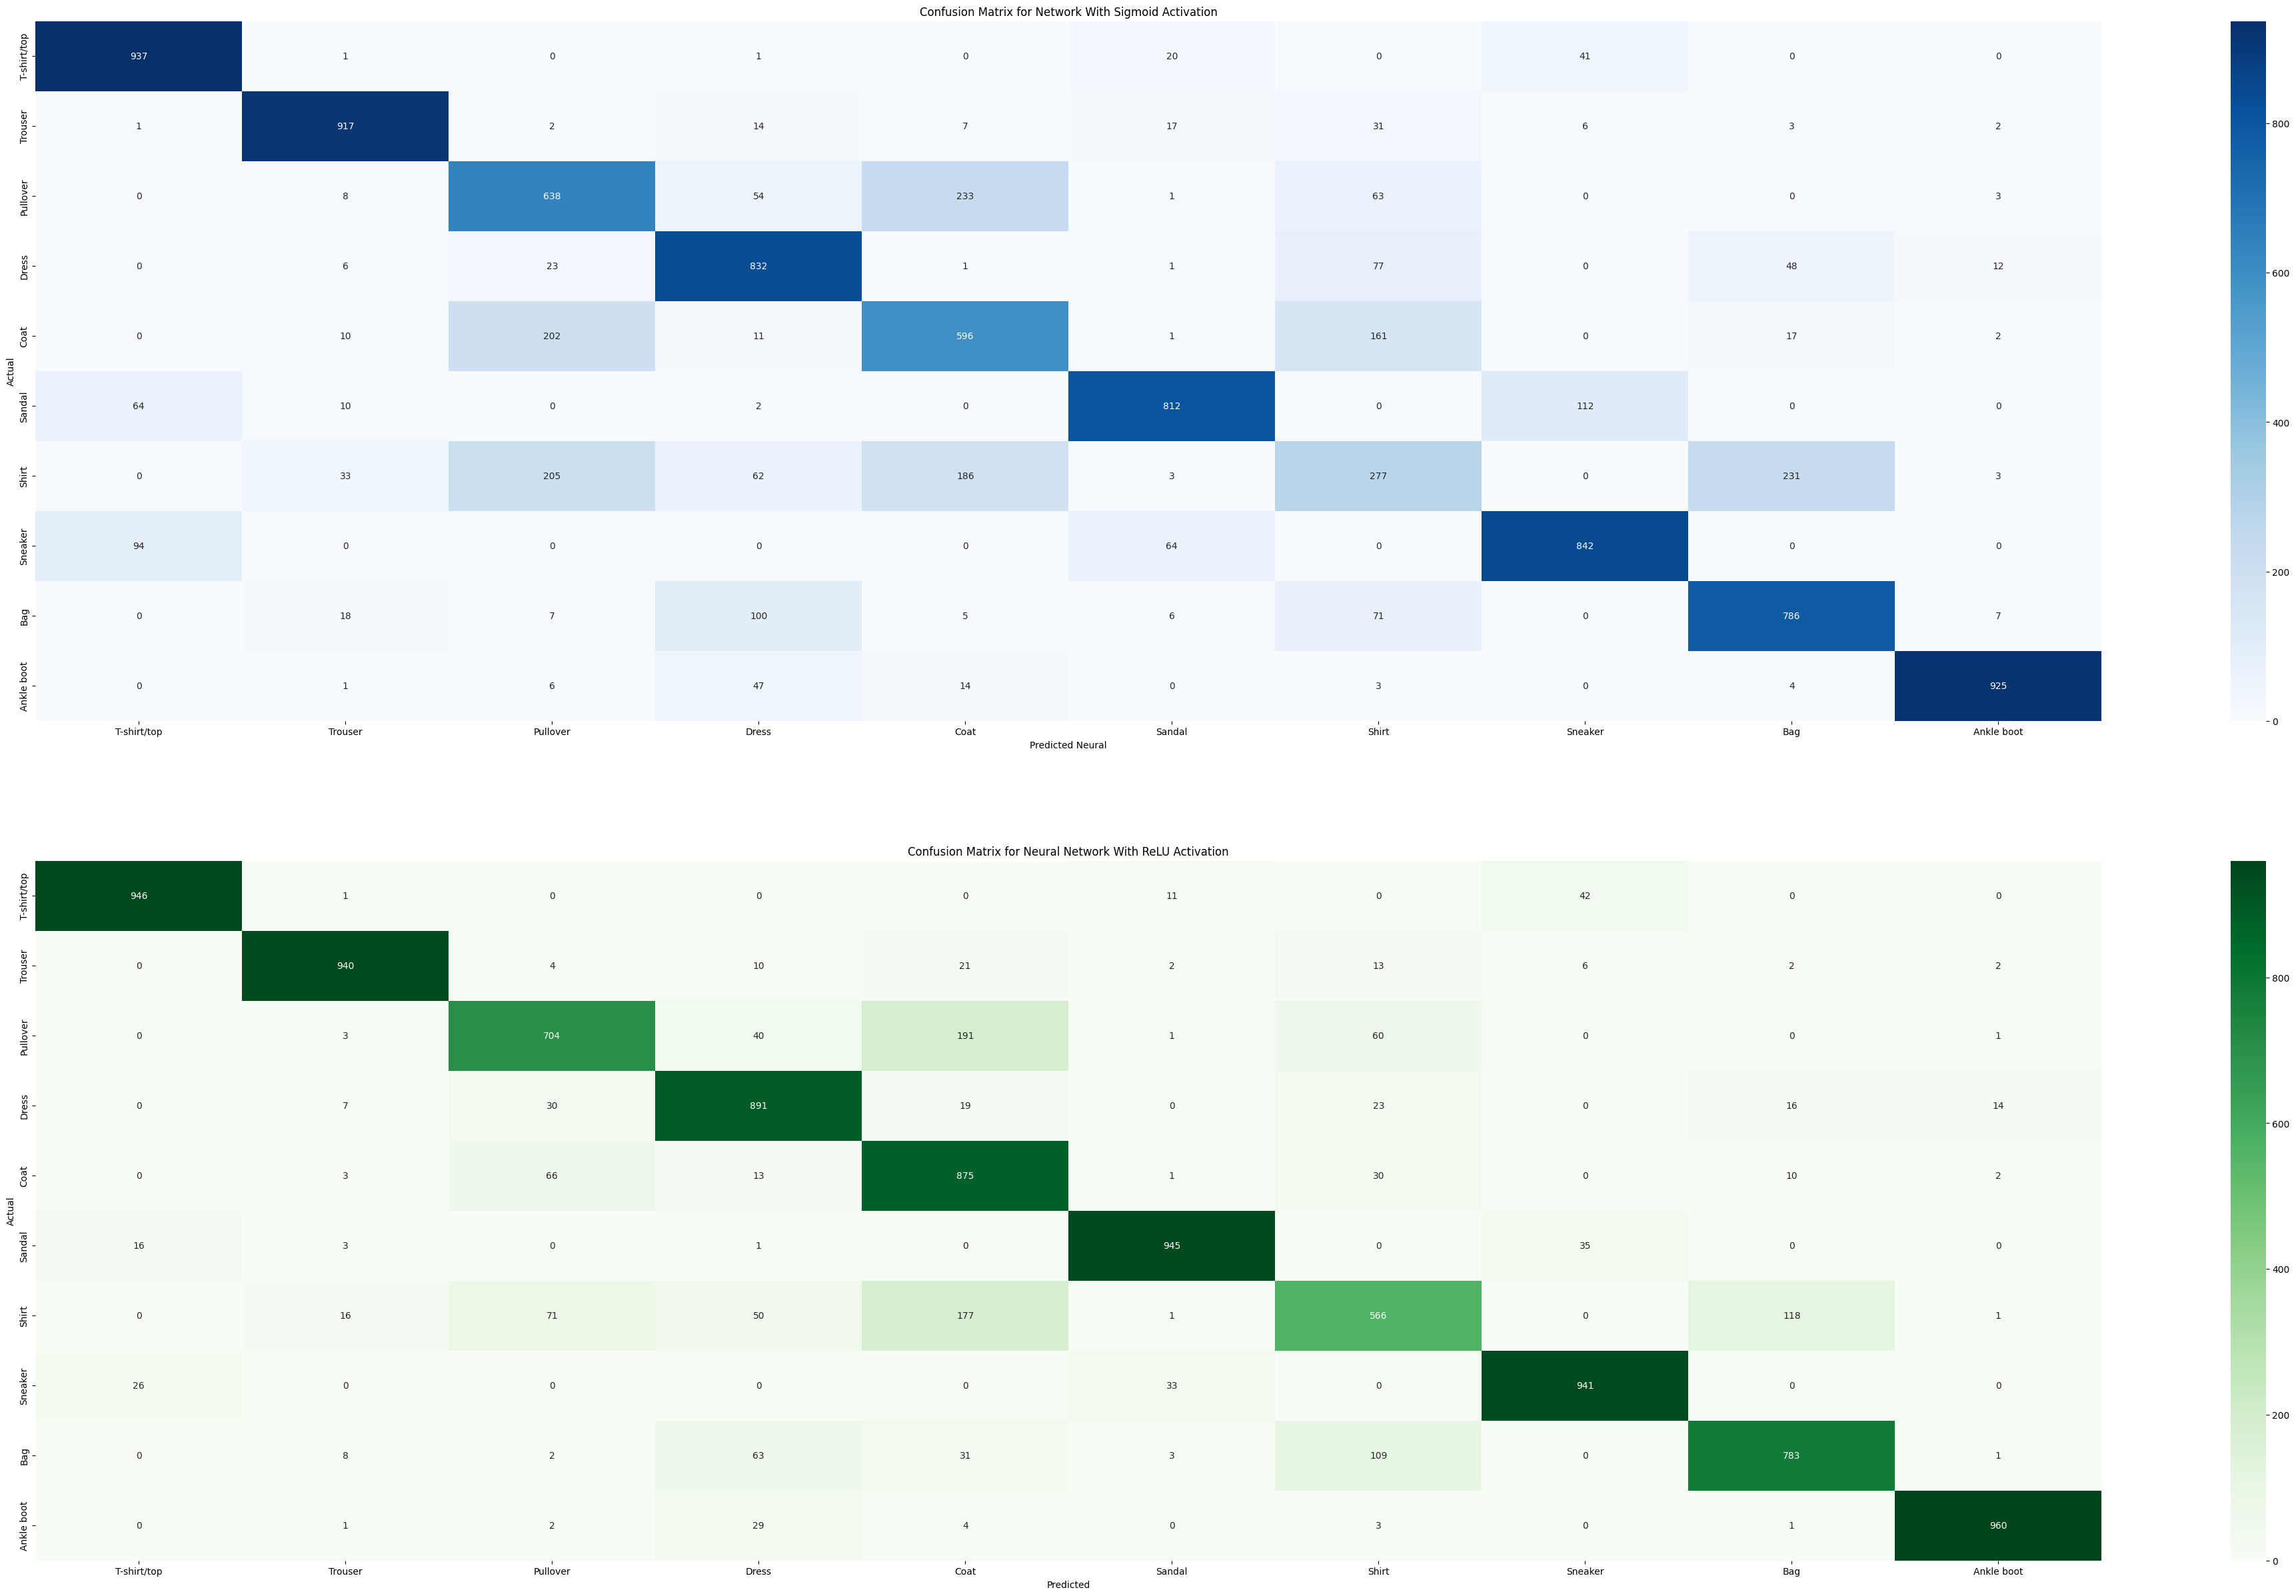

In [47]:
plt.figure(figsize=(50,30))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Neural')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Network With Sigmoid Activation')

plt.subplot(2,1,2)
sns.heatmap(cm2, annot=True, cmap='Greens',fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network With ReLU Activation')
plt.show()

In [48]:
dump(model, 'model_relu_fashion_mnist_tf_neural_network.joblib')

['model_relu_fashion_mnist_tf_neural_network.joblib']